<a href="https://colab.research.google.com/github/OliverZarate/Regresi-n-Lineal/blob/main/Actividad_4_(Regresi%C3%B3n_Lineal_Simple)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.- Preprocesamiento

## Columnas interés

In [ ]:

df = pd.read_csv('/content/DF_Mexico.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [ ]:
# Obtener columnas de interés
df = df[['host_acceptance_rate','host_response_rate','room_type','price','number_of_reviews',
         'review_scores_location','review_scores_cleanliness','availability_365','reviews_per_month','review_scores_communication']]
df

,host_acceptance_rate,host_response_rate,room_type,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,NaN,100%,Entire home/apt,"$1,434.00",21,5.00,4.95,324,0.19,4.95
1,NaN,NaN,Entire home/apt,$830.00,61,4.95,4.88,346,0.54,5.00
2,90%,100%,Entire home/apt,"$1,469.00",39,4.58,4.71,87,0.31,4.92
3,NaN,NaN,Entire home/apt,"$3,658.00",0,NaN,NaN,363,NaN,NaN
4,86%,100%,Entire home/apt,"$18,000.00",64,4.98,4.70,357,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,Entire home/apt,$760.00,0,NaN,NaN,352,NaN,NaN
24220,NaN,NaN,Entire home/apt,"$1,520.00",0,NaN,NaN,365,NaN,NaN
24221,96%,NaN,Private room,$533.00,0,NaN,NaN,180,NaN,NaN
24222,100%,100%,Entire home/apt,"$1,200.00",0,NaN,NaN,344,NaN,NaN


In [ ]:
valores_a_mantener = ["Private room", "Hotel room"]


mascara = df['room_type'].isin(valores_a_mantener)

df = df[mascara].reset_index(drop=True)
df

,host_acceptance_rate,host_response_rate,room_type,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,100%,100%,Private room,"$1,089.00",62,4.94,4.90,168,0.94,4.95
1,87%,90%,Hotel room,"$1,006.00",23,4.83,4.83,340,0.18,5.00
2,0%,NaN,Private room,$726.00,5,4.80,4.20,363,0.04,4.60
3,NaN,0%,Private room,$375.00,5,4.40,4.60,284,0.04,4.80
4,0%,NaN,Private room,"$2,835.00",0,NaN,NaN,365,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8324,NaN,NaN,Private room,"$1,280.00",0,NaN,NaN,301,NaN,NaN
8325,NaN,NaN,Private room,$750.00,0,NaN,NaN,176,NaN,NaN
8326,100%,100%,Private room,$600.00,0,NaN,NaN,345,NaN,NaN
8327,100%,NaN,Private room,$251.00,0,NaN,NaN,364,NaN,NaN


## Datos nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         7391 non-null   object 
 1   host_response_rate           6881 non-null   object 
 2   room_type                    8329 non-null   object 
 3   price                        8329 non-null   object 
 4   number_of_reviews            8329 non-null   int64  
 5   review_scores_location       6495 non-null   float64
 6   review_scores_cleanliness    6496 non-null   float64
 7   availability_365             8329 non-null   int64  
 8   reviews_per_month            6528 non-null   float64
 9   review_scores_communication  6496 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 650.8+ KB


In [ ]:
valores_nulos=df.isnull().sum()
valores_nulos

host_acceptance_rate            938
host_response_rate             1448
room_type                         0
price                             0
number_of_reviews                 0
review_scores_location         1834
review_scores_cleanliness      1833
availability_365                  0
reviews_per_month              1801
review_scores_communication    1833
dtype: int64

In [ ]:

df = df.dropna().reset_index(drop=True)
df

,host_acceptance_rate,host_response_rate,room_type,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,100%,100%,Private room,"$1,089.00",62,4.94,4.90,168,0.94,4.95
1,87%,90%,Hotel room,"$1,006.00",23,4.83,4.83,340,0.18,5.00
2,100%,100%,Private room,$549.00,4,5.00,5.00,336,0.04,5.00
3,33%,50%,Private room,"$1,543.00",158,4.96,4.97,295,1.41,4.96
4,77%,100%,Private room,$302.00,90,4.98,4.59,354,0.82,4.94
...,...,...,...,...,...,...,...,...,...,...
5649,100%,100%,Private room,$650.00,1,3.00,5.00,365,1.00,4.00
5650,100%,100%,Private room,$289.00,2,5.00,5.00,357,2.00,5.00
5651,100%,100%,Private room,$480.00,1,5.00,5.00,180,1.00,5.00
5652,97%,100%,Private room,$332.00,3,5.00,5.00,119,3.00,5.00


In [ ]:
valores_nulos=df.isnull().sum()
valores_nulos

host_acceptance_rate           0
host_response_rate             0
room_type                      0
price                          0
number_of_reviews              0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64

## Outliers

In [ ]:

df['price'] = df['price'].str.replace('$', '',regex=True).replace(',', '',regex=True)
df = df.replace('%', '', regex=True)
df = df.astype({"host_acceptance_rate": "int32",
                "host_response_rate":"int32",
                "price":"float64"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         5654 non-null   int32  
 1   host_response_rate           5654 non-null   int32  
 2   room_type                    5654 non-null   object 
 3   price                        5654 non-null   float64
 4   number_of_reviews            5654 non-null   int64  
 5   review_scores_location       5654 non-null   float64
 6   review_scores_cleanliness    5654 non-null   float64
 7   availability_365             5654 non-null   int64  
 8   reviews_per_month            5654 non-null   float64
 9   review_scores_communication  5654 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(1)
memory usage: 397.7+ KB


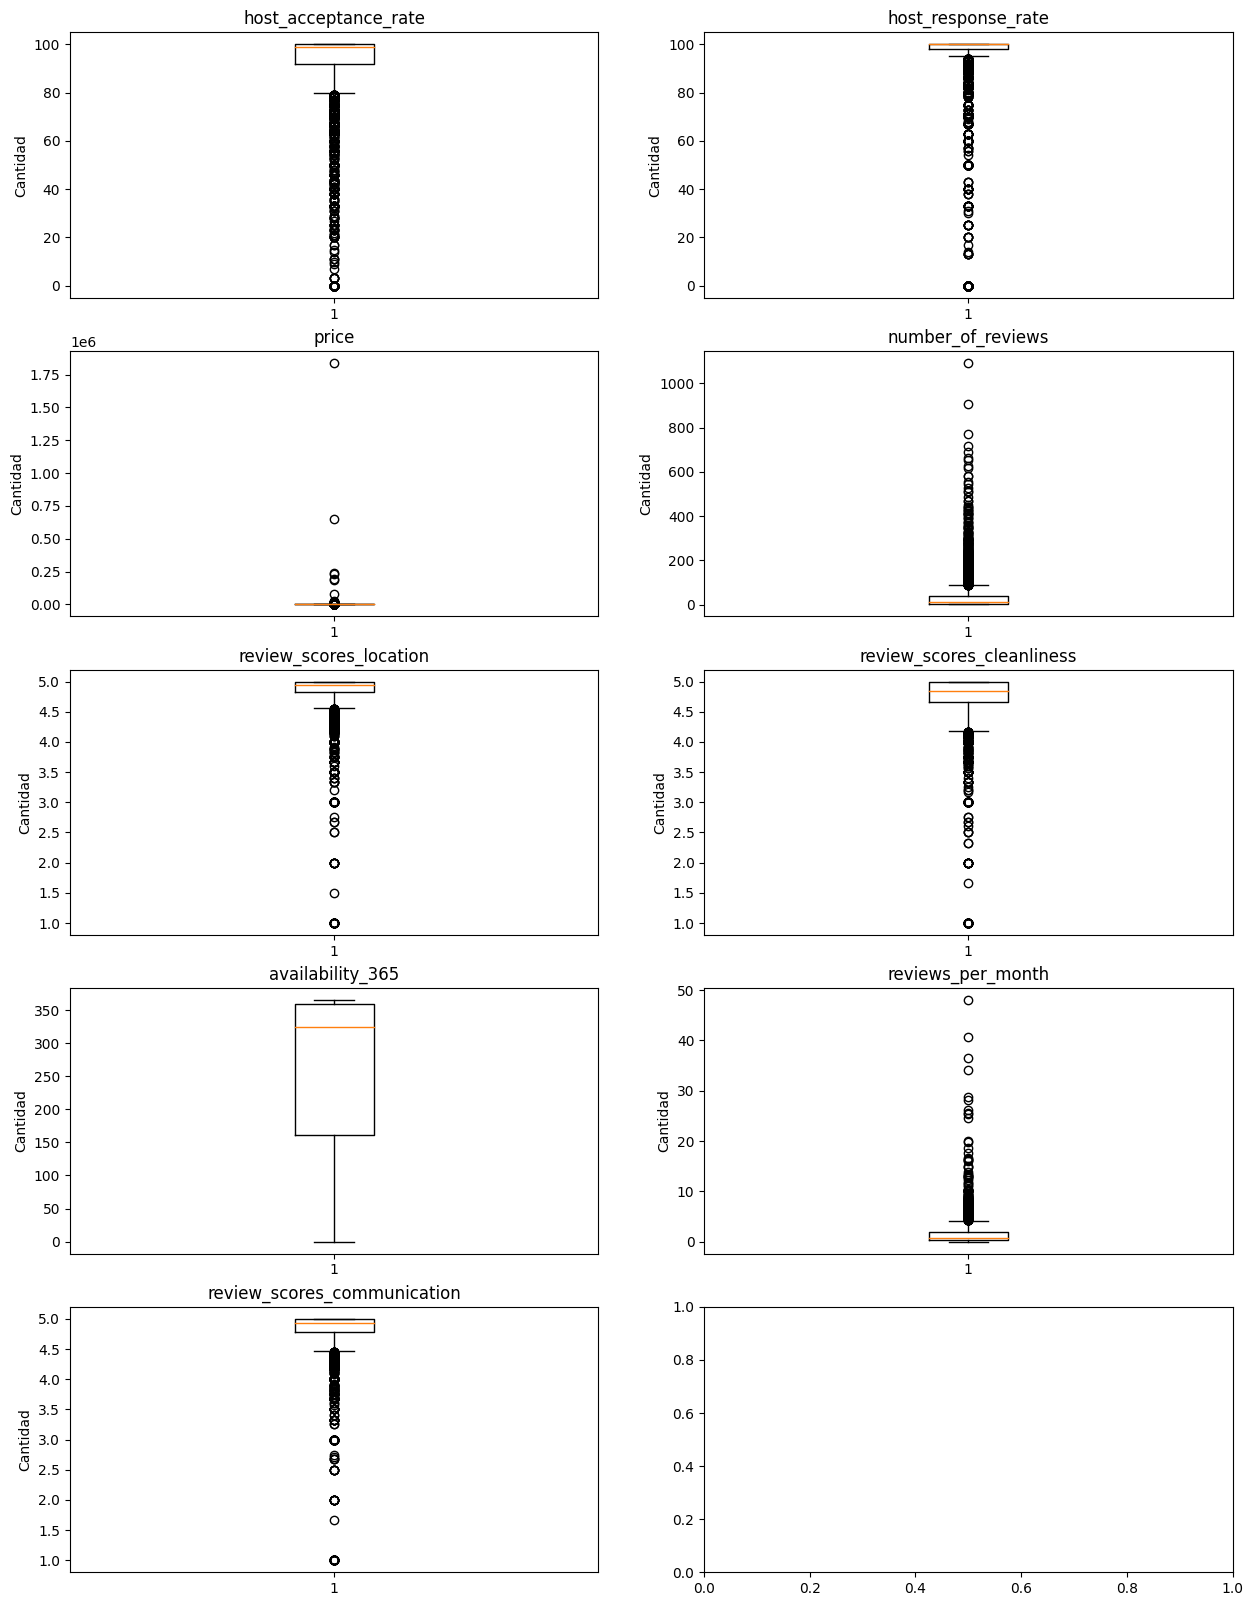

In [ ]:


fig, axs = plt.subplots(5,2, figsize=(15, 20))


axs = axs.ravel()

for i,variable in zip(range(len(df.drop('room_type',axis=1).columns)),df.drop('room_type',axis=1).columns):
  axs[i].boxplot(df[variable])
  axs[i].set(ylabel='Cantidad')
  axs[i].set_title(variable)

In [ ]:
outliers_col = {}

for columna in df.drop('room_type',axis=1).columns:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)


  IQR = Q3 - Q1


  lim_inf = Q1 - 1.5 * IQR
  lim_sup = Q3 + 1.5 * IQR


  outlier_mask = (df[columna] < lim_inf) | (df[columna] > lim_sup)


  outliers_columna = df[outlier_mask]

  outlier_indices = df.index[outlier_mask].tolist()
  outlier_valores = df.loc[outlier_indices, columna].tolist()

  outliers_col[columna] = outlier_indices

In [ ]:
for columna in outliers_col:

  df.loc[outliers_col[columna],columna] = np.nan


  media = df[columna].mean()
  df[columna].fillna(media,inplace=True)

df

,host_acceptance_rate,host_response_rate,room_type,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,100.000000,100.000000,Private room,1089.00000,62.000000,4.940000,4.90,168.0,0.94,4.950000
1,87.000000,99.675359,Hotel room,1006.00000,23.000000,4.830000,4.83,340.0,0.18,5.000000
2,100.000000,100.000000,Private room,549.00000,4.000000,5.000000,5.00,336.0,0.04,5.000000
3,97.288229,99.675359,Private room,529.74196,18.701716,4.960000,4.97,295.0,1.41,4.960000
4,97.288229,100.000000,Private room,302.00000,18.701716,4.980000,4.59,354.0,0.82,4.940000
...,...,...,...,...,...,...,...,...,...,...
5649,100.000000,100.000000,Private room,650.00000,1.000000,4.917301,5.00,365.0,1.00,4.898145
5650,100.000000,100.000000,Private room,289.00000,2.000000,5.000000,5.00,357.0,2.00,5.000000
5651,100.000000,100.000000,Private room,480.00000,1.000000,5.000000,5.00,180.0,1.00,5.000000
5652,97.000000,100.000000,Private room,332.00000,3.000000,5.000000,5.00,119.0,3.00,5.000000


# 4.- Correlación

In [ ]:
import random
import matplotlib.colors as mcolors

def random_color_generator():
  color = random.choice(list(mcolors.CSS4_COLORS.keys()))
  return color

In [ ]:
corr_des = [('host_acceptance_rate','host_response_rate'),
            ('host_acceptance_rate','price'),
            ('host_acceptance_rate','number_of_reviews'),
            ('review_scores_location','review_scores_cleanliness'),
            ('availability_365','number_of_reviews'),
            ('reviews_per_month','review_scores_communication')]

## Tipo de habitación: Private room

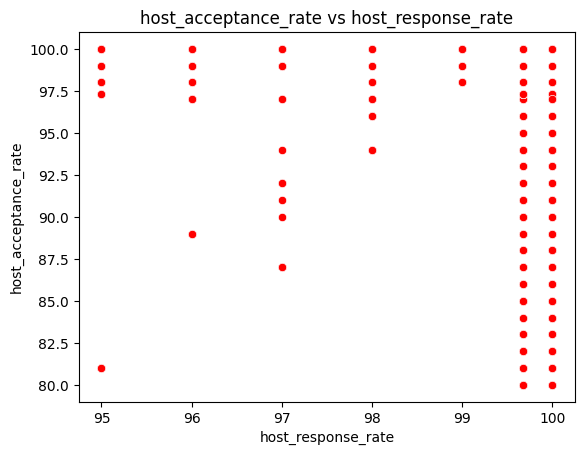

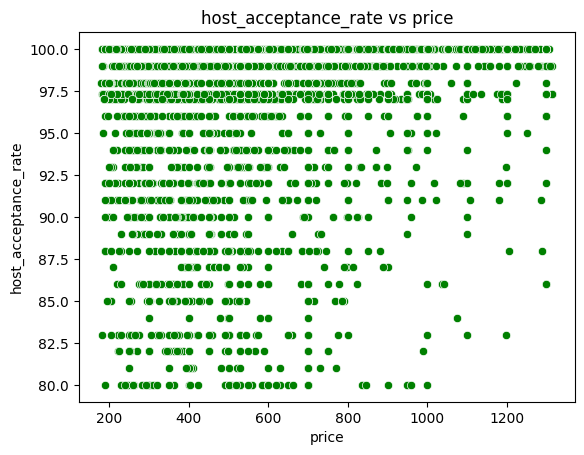

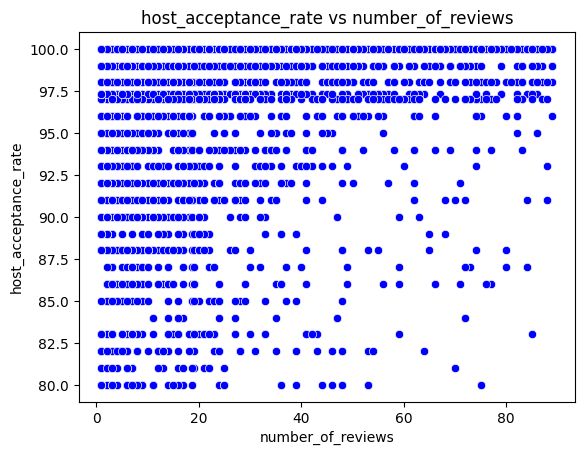

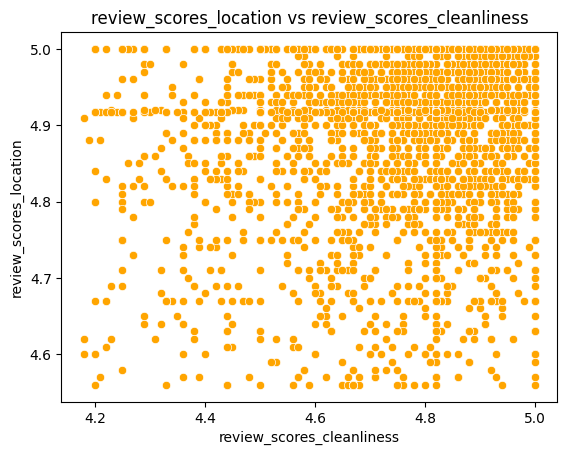

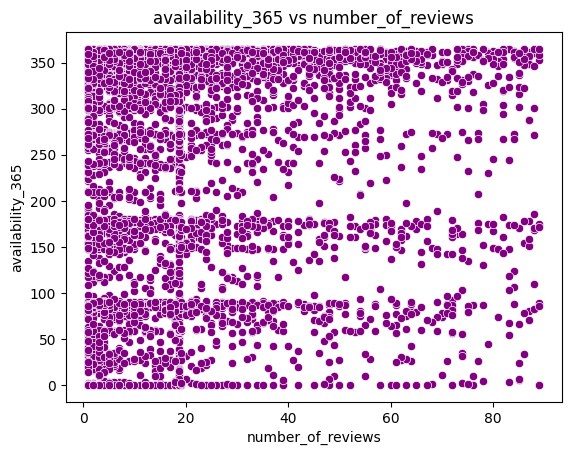

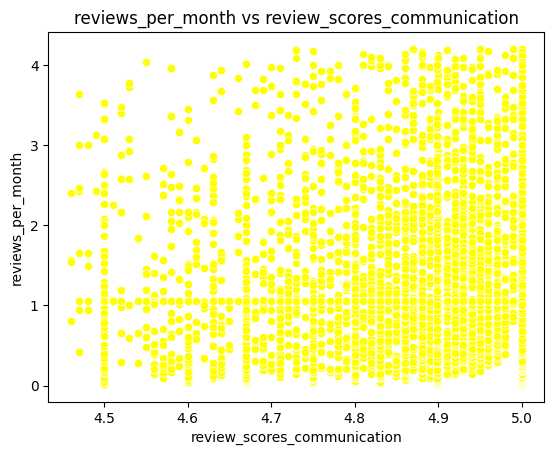

In [ ]:
df_PR = df[df['room_type'] == 'Private room']
colors = ['red','green','blue','orange','purple','yellow']


for pareja, color in zip(corr_des,colors):
  plt.figure()
  sns.scatterplot(y=pareja[0], x=pareja[1], color=color, data=df_PR)
  plt.title(f'{pareja[0]} vs {pareja[1]}')

In [ ]:

for pareja in corr_des:
  correl = df_PR[pareja[0]].corr(df_PR[pareja[1]])
  print(f'La correlación entre {pareja[0]} y {pareja[1]} es {correl}')

La correlación entre host_acceptance_rate y host_response_rate es -0.07450373335114688
La correlación entre host_acceptance_rate y price es 0.08882795942797526
La correlación entre host_acceptance_rate y number_of_reviews es 0.06486892540481559
La correlación entre review_scores_location y review_scores_cleanliness es 0.3295085348820608
La correlación entre availability_365 y number_of_reviews es -0.0667905442798256
La correlación entre reviews_per_month y review_scores_communication es -0.15682139090244296


## Tipo de habitación: Hotel Room

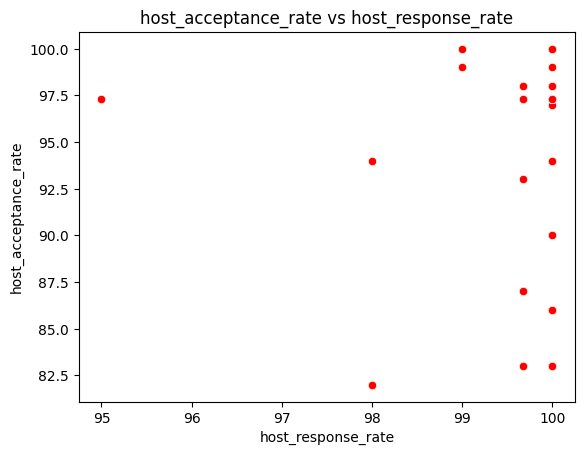

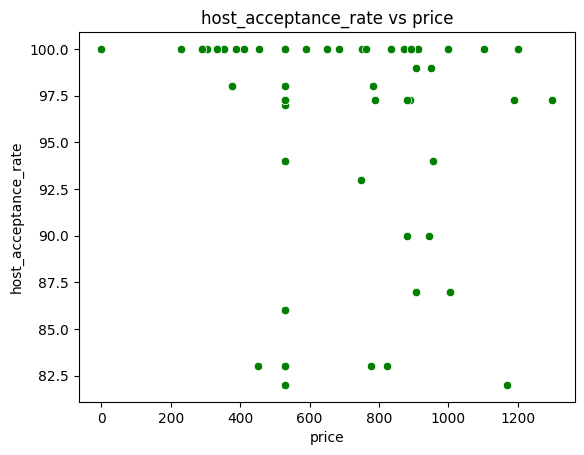

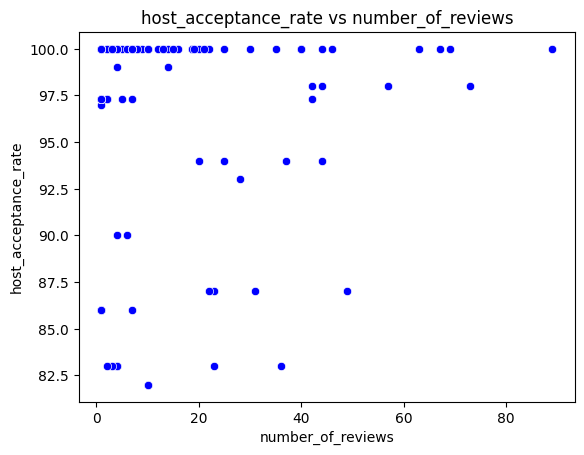

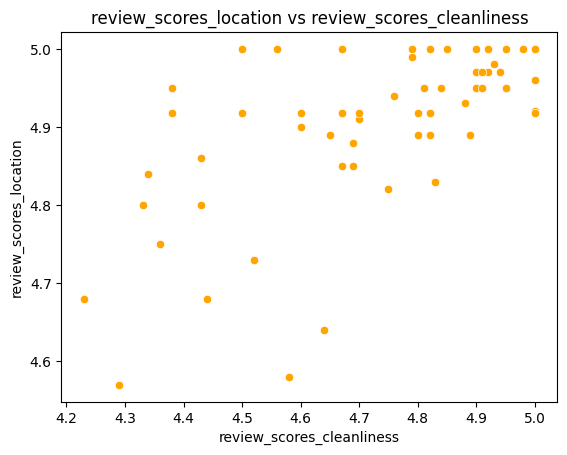

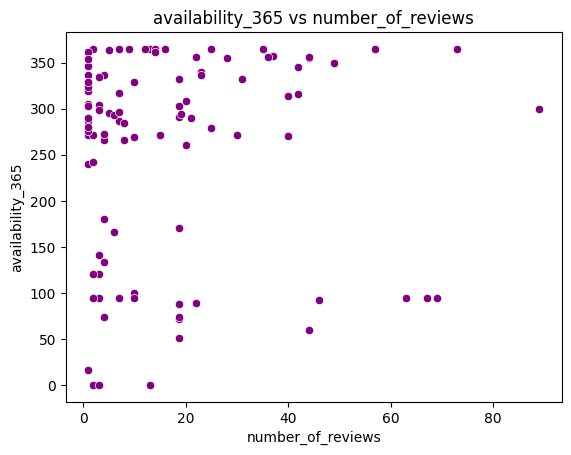

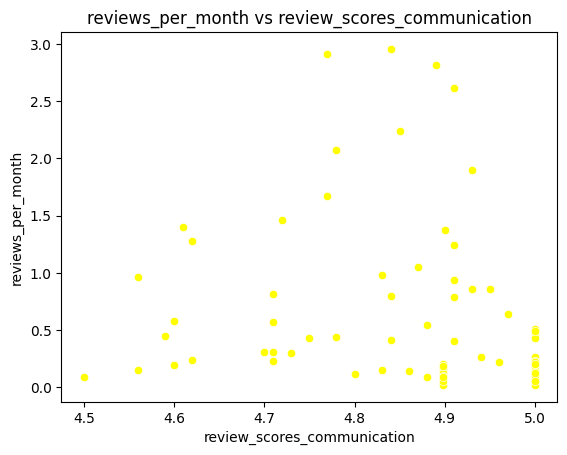

In [ ]:
df_HR = df[df['room_type'] == 'Hotel room']

for pareja, color in zip(corr_des,colors):
  plt.figure()
  sns.scatterplot(y=pareja[0], x=pareja[1], color=color, data=df_HR)
  plt.title(f'{pareja[0]} vs {pareja[1]}')

In [ ]:


for pareja in corr_des:
  correl = df_HR[pareja[0]].corr(df_HR[pareja[1]])
  print(f'La correlación entre {pareja[0]} y {pareja[1]} es {correl}')

La correlación entre host_acceptance_rate y host_response_rate es 0.15274295825395479
La correlación entre host_acceptance_rate y price es -0.1866838721466559
La correlación entre host_acceptance_rate y number_of_reviews es 0.08930295360744935
La correlación entre review_scores_location y review_scores_cleanliness es 0.726521620064242
La correlación entre availability_365 y number_of_reviews es 0.043494230564856365
La correlación entre reviews_per_month y review_scores_communication es -0.28780396356999227


# 5.- Modelo matemática para "number_of_reviews"

## Tipo de habitación: Private room

In [ ]:

from sklearn.linear_model import LinearRegression

Vars_Indep= df_PR[['availability_365']]
Var_Dep= df_PR['number_of_reviews']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
print(model.coef_,model.intercept_)

[-0.01096323] 21.540928643532734


Mejor modelo: $Y = -0.011X + 21.54$

## Tipo de habitación: Hotel room

In [ ]:
from sklearn.linear_model import LinearRegression

Vars_Indep= df_HR[['host_acceptance_rate']]
Var_Dep= df_HR['number_of_reviews']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
print(model.coef_,model.intercept_)

[0.29138223] -10.899737742900225


Mejor modelo: $Y = 0.29X - 10.9$

# 6.- Coeficientes de correlación y determinación entre todas las variables

## Tipo de habitación: Private room

In [ ]:

all_correl = df_PR.corr(numeric_only=True)
all_correl

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.000000,-0.074504,0.088828,0.064869,-0.039903,-0.043269,0.045023,0.151197,-0.061857
host_response_rate,-0.074504,1.000000,-0.097168,-0.069735,0.067098,0.130784,-0.031404,-0.082897,0.212025
price,0.088828,-0.097168,1.000000,0.031779,0.111977,0.117136,0.114835,0.051624,0.017901
number_of_reviews,0.064869,-0.069735,0.031779,1.000000,-0.131057,-0.097484,-0.066791,0.339272,-0.161210
review_scores_location,-0.039903,0.067098,0.111977,-0.131057,1.000000,0.329509,-0.052721,-0.100214,0.335472
review_scores_cleanliness,-0.043269,0.130784,0.117136,-0.097484,0.329509,1.000000,-0.042719,-0.100459,0.457151
availability_365,0.045023,-0.031404,0.114835,-0.066791,-0.052721,-0.042719,1.000000,0.015042,-0.065088
reviews_per_month,0.151197,-0.082897,0.051624,0.339272,-0.100214,-0.100459,0.015042,1.000000,-0.156821
review_scores_communication,-0.061857,0.212025,0.017901,-0.161210,0.335472,0.457151,-0.065088,-0.156821,1.000000


<Axes: >

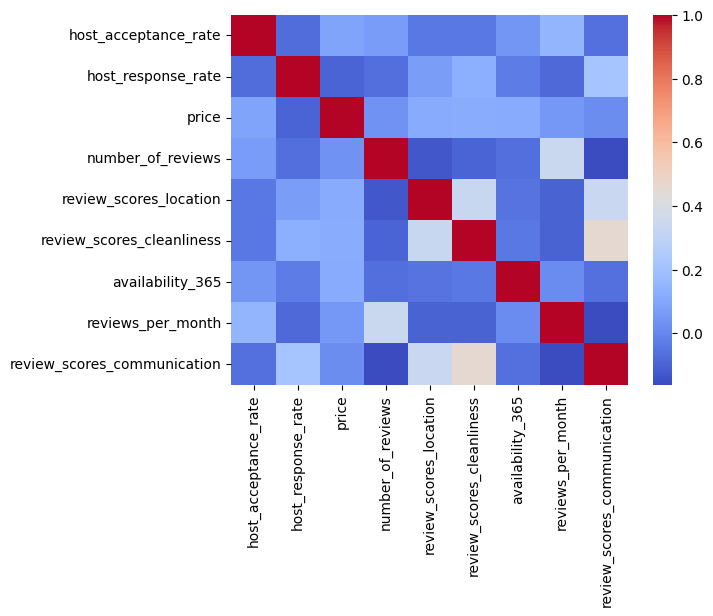

In [ ]:

hm = sns.heatmap(all_correl, cmap = 'coolwarm')
hm

In [ ]:

all_r2 = all_correl ** 2
all_r2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.000000,0.005551,0.007890,0.004208,0.001592,0.001872,0.002027,0.022861,0.003826
host_response_rate,0.005551,1.000000,0.009442,0.004863,0.004502,0.017105,0.000986,0.006872,0.044955
price,0.007890,0.009442,1.000000,0.001010,0.012539,0.013721,0.013187,0.002665,0.000320
number_of_reviews,0.004208,0.004863,0.001010,1.000000,0.017176,0.009503,0.004461,0.115106,0.025989
review_scores_location,0.001592,0.004502,0.012539,0.017176,1.000000,0.108576,0.002779,0.010043,0.112541
review_scores_cleanliness,0.001872,0.017105,0.013721,0.009503,0.108576,1.000000,0.001825,0.010092,0.208987
availability_365,0.002027,0.000986,0.013187,0.004461,0.002779,0.001825,1.000000,0.000226,0.004236
reviews_per_month,0.022861,0.006872,0.002665,0.115106,0.010043,0.010092,0.000226,1.000000,0.024593
review_scores_communication,0.003826,0.044955,0.000320,0.025989,0.112541,0.208987,0.004236,0.024593,1.000000


## Tipo de habitación: Private room

In [ ]:

all_correl = df_HR.corr(numeric_only=True)
all_correl

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.000000,0.152743,-0.186684,0.089303,-0.138793,-0.146365,-0.052596,0.236259,0.016276
host_response_rate,0.152743,1.000000,-0.059992,0.060582,-0.063576,-0.106776,-0.131389,0.080644,-0.022852
price,-0.186684,-0.059992,1.000000,-0.222077,0.131439,0.156770,0.120301,-0.146510,0.071369
number_of_reviews,0.089303,0.060582,-0.222077,1.000000,-0.324322,-0.364720,0.043494,0.521382,-0.358535
review_scores_location,-0.138793,-0.063576,0.131439,-0.324322,1.000000,0.726522,0.153745,-0.151194,0.475811
review_scores_cleanliness,-0.146365,-0.106776,0.156770,-0.364720,0.726522,1.000000,0.193823,-0.218267,0.531606
availability_365,-0.052596,-0.131389,0.120301,0.043494,0.153745,0.193823,1.000000,-0.175333,0.083582
reviews_per_month,0.236259,0.080644,-0.146510,0.521382,-0.151194,-0.218267,-0.175333,1.000000,-0.287804
review_scores_communication,0.016276,-0.022852,0.071369,-0.358535,0.475811,0.531606,0.083582,-0.287804,1.000000


<Axes: >

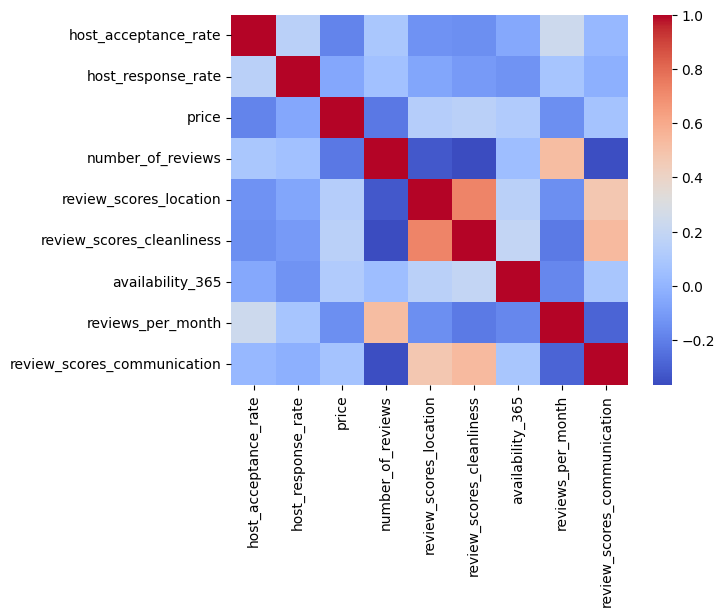

In [ ]:

hm = sns.heatmap(all_correl, cmap = 'coolwarm')
hm

In [ ]:

all_r2 = all_correl ** 2
all_r2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.000000,0.023330,0.034851,0.007975,0.019263,0.021423,0.002766,0.055818,0.000265
host_response_rate,0.023330,1.000000,0.003599,0.003670,0.004042,0.011401,0.017263,0.006503,0.000522
price,0.034851,0.003599,1.000000,0.049318,0.017276,0.024577,0.014472,0.021465,0.005094
number_of_reviews,0.007975,0.003670,0.049318,1.000000,0.105184,0.133021,0.001892,0.271839,0.128548
review_scores_location,0.019263,0.004042,0.017276,0.105184,1.000000,0.527834,0.023638,0.022860,0.226396
review_scores_cleanliness,0.021423,0.011401,0.024577,0.133021,0.527834,1.000000,0.037567,0.047640,0.282605
availability_365,0.002766,0.017263,0.014472,0.001892,0.023638,0.037567,1.000000,0.030742,0.006986
reviews_per_month,0.055818,0.006503,0.021465,0.271839,0.022860,0.047640,0.030742,1.000000,0.082831
review_scores_communication,0.000265,0.000522,0.005094,0.128548,0.226396,0.282605,0.006986,0.082831,1.000000
